<a href="https://colab.research.google.com/github/barbarakotlan/CSCI_4170/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3 - Deep Learning

Projects in AI & ML, Spring 2026

Barbara Kotlan

2/16/2026

#Dataset
Secondary Mushroom Dataset

Classification - Predict whether a mushroom is edible or poisonous

Link: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Instances: 61,068

Features: 20

In [14]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
meta = secondary_mushroom.metadata

# variable information
var = secondary_mushroom.variables



#Part 1 (50 points)
In this part you will implement a neural network from scratch. You cannot use any existing Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient calculations. Refer to Lecture 5 slides for details on computations required.

Write a Class called NeuralNetwork that has at least the following methods (you are free to add
your own methods too):

a. Initialization method.

b. Forward propagation method that performs forward propagation calculations.

c. Backward propagation method that implements the backpropagation algorithm
discussed in class.

d. Train method that includes the code for gradient descent.

e.  Cost method that calculates the loss function.

f. Predict method that calculates the predictions for the test set.

Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may notice inefficiencies in runtime. Try incorporating different versions of gradient descent to improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for this task (or any other technique). Explain which technique you followed and why.

In [15]:
# creating neuralnetwork
import numpy as np

class NeuralNetwork:
  # initalize variables (weights random but small, bias zero)
  def __init__(self, input_size, hidden_size, output_size, learning_rate):
    self.W1 = np.random.randn(input_size, hidden_size) * 0.01
    self.b1 = np.zeros((1, hidden_size))

    self.W2 = np.random.randn(hidden_size, output_size) * 0.01
    self.b2 = np.zeros((1, output_size))

    self.lr = learning_rate

  # activation function
  def sigmoid(self, z):
    return 1 / (1+ np.exp(-np.clip(z, -15, 15)))

  # activation function derivative
  def sigmoid_derivative(self, a):
    return a * (1-a)

  # cost function (binary cross entropy)
  def cost(self, y, y_hat):
    y_hat = np.clip(y_hat, 1e-12, 1 - 1e-12)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

  # forward propagation
  def forward(self, X):
    # layer 1
    self.Z1 = np.dot(X, self.W1) + self.b1
    self.A1 = self.sigmoid(self.Z1)

    # output
    self.Z2 = np.dot(self.A1, self.W2) + self.b2
    self.A2 = self.sigmoid(self.Z2)

    return self.A2

  def backward(self, X, y):
    m = m = X.shape[0]

    # partial derivatives for output
    dZ2 = self.A2 - y

    # partial derivatives of cost wrt param.
    dW2 = (1/m) * np.dot(self.A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

    # partial for hidden layer
    dA1 = np.dot(dZ2, self.W2.T)

    # derivative
    dZ1 = dA1 * self.sigmoid_derivative(self.A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    # gradient descent update
    self.W2 -= self.lr * dW2
    self.b2 -= self.lr * db2
    self.W1 -= self.lr * dW1
    self.b1 -= self.lr * db1

  # training using mini batch descent
  def train(self, X, y, epochs, batch_size=64):
    m = X.shape[0]
    for i in range(epochs):
      permutation = np.random.permutation(m)
      X_shuffled = X[permutation]
      y_shuffled = y[permutation]
      for j in range(0, m, batch_size):
        X_batch = X_shuffled[j:j+batch_size]
        y_batch = y_shuffled[j:j+batch_size]
        self.forward(X_batch)
        self.backward(X_batch, y_batch)

      if i % 100 == 0:
        sample_X = X[:1000]
        sample_y = y[:1000]
        y_hat = self.forward(sample_X)
        loss = self.cost(sample_y, y_hat)
        print("Epoch: {}  Loss: {}".format(i, loss))

  # predicting
  def predict(self, X):
    y_hat = self.forward(X)
    return (y_hat > 0.5)


In [17]:
#pre-processing
y_map = y['class']
y_map = y_map.map({'p': 0, 'e':1})

cat_cols = X.select_dtypes(include='object').columns
X_one_hot = pd.get_dummies(X, columns=cat_cols)


In [18]:
#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y_map, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

input_size = X_train.shape[1]

subset_size = 10000
X_train_sub = X_train[:subset_size]
y_train_sub = y_train[:subset_size]



In [19]:
#Testing neural network

# model
nn = NeuralNetwork(input_size=input_size, hidden_size=32, output_size=1, learning_rate=0.001)
nn.train(X_train_sub, y_train_sub, epochs=1000, batch_size=64)

# evaluation
y_pred = nn.predict(X_test)
accuracy = np.mean(y_pred.flatten() == y_test.flatten())
print("Accuracy: {}".format(accuracy))

Epoch: 0  Loss: 0.6916715109780291
Epoch: 100  Loss: 0.6864989703682152
Epoch: 200  Loss: 0.6023615439963205
Epoch: 300  Loss: 0.44230251376847385
Epoch: 400  Loss: 0.3748272186358272
Epoch: 500  Loss: 0.3486536472999609
Epoch: 600  Loss: 0.33523335844455926
Epoch: 700  Loss: 0.32666226404028625
Epoch: 800  Loss: 0.3197543097361125
Epoch: 900  Loss: 0.3130617540224051
Accuracy: 0.8644997543802194


I first trained my class on the full dataset but noticed that runtime was slow when using standard batch gradient descent, since each update required computing gradients over the entire dataset. To improve efficiency, I switched to mini-batch gradient descent, which updates the weights using smaller batches of data and significantly speeds up training while maintaining stable convergence. I also used a subset of the dataset to further reduce runtime. I chose mini-batch gradient descent because it provides a good balance between computational efficiency and stable learning.

#Part 2 (50 points)
In this part you will implement a 2-layer neural network using any Deep Learning Framework (e.g., TensorFlow, PyTorch etc.).  

You should pick a Deep Learning Framework that you would like to use to implement your 2
layer Neural Network.

# Task 1 (5 points):
Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

I have chosen to use PyTorch as my framework to create a neural network. I used several online resources to understand how to use this framework as well.

I used the PyTorch "Build the Neural Network": https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html. This says how to define a modeling using torch.nn.Module and create layers like nn.Linear. It also was helpful for understand the forward probagation.

Then, I used the Autograd tutorial: https://docs.pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html. This helped with the automatic differentiaiton and backward propagation. It detailed how PyTorch tracks operations on tensors and computes gradients.

Lastly, I used Optim documentation: https://docs.pytorch.org/docs/stable/optim.html. This resourse described how optimizers are implemented and how gradents are updated. This was useful for manaing the traning loop and the parameter updates.


#Task 2 (35 points):
Once you have figured out the resources you need for the project, you
should design and implement your project. The project must include the following steps (it’s not limited to these steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how
your model performs when the inputs are normalized.
6. Present the results using the test set.

NOTE: In this step, once you have implemented your 2-layer network you may increase and/or
decrease the number of layers as part of the hyperparameter tuning process.

Shape: (61069, 20)

Number of missing values: 
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Number of missing values: 
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0


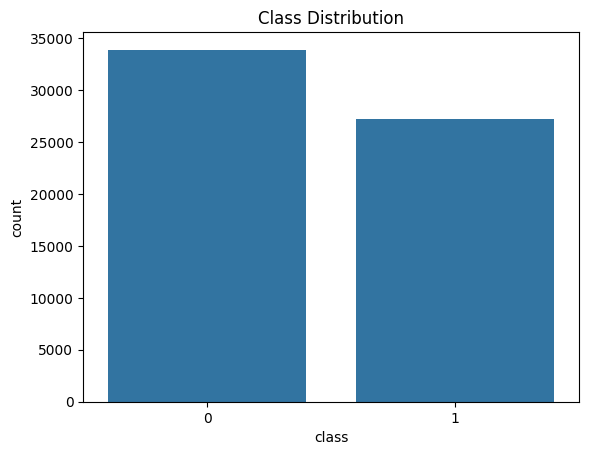

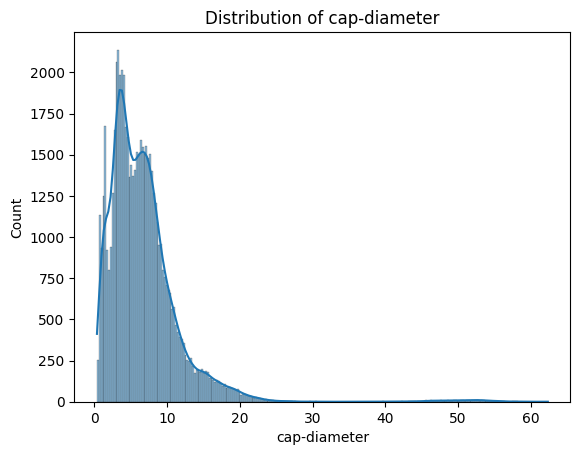

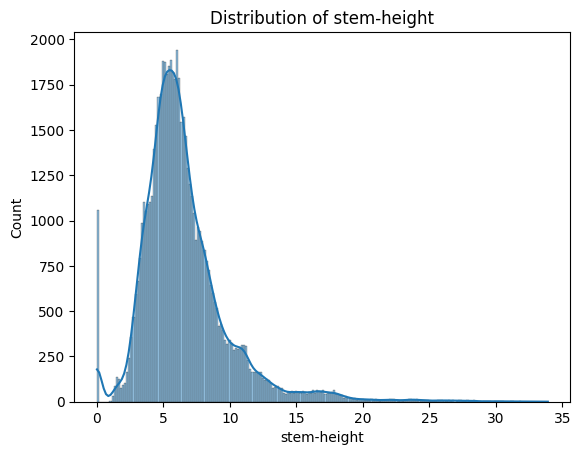

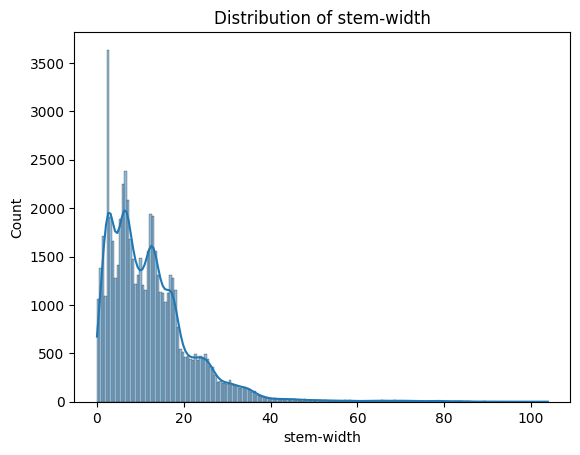

In [20]:
#1. EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Check shape
print("Shape: {}\n".format(X.shape))

#Check for null
X = X.copy()
print("Number of missing values: \n{}\n".format(X.isnull().sum()))

#Removing columns with >80% missing values
X = X.drop(columns=['veil-type', 'spore-print-color', 'veil-color', 'stem-root'])

#Replacing
cat_cols = X.select_dtypes(include='object').columns
X[cat_cols] = X[cat_cols].fillna("unknown")
print("Number of missing values: \n{}\n".format(X.isnull().sum()))

#Sumary Statistics
print("Statistical Summary: \n{}\n".format(X.describe()))

#One-hot encoding
cat_cols = X.select_dtypes(include='object').columns
X_one_hot = pd.get_dummies(X, columns=cat_cols)

#Mapping y
y = y["class"]
y = y.map({'p': 0, 'e':1})

#Class balance
print("Class balance: \n{}\n".format(y.value_counts()))
print("\nThis tells us that the datatset is {:.3f}%  poisonous and {:.3f}% edible mushrooms.".format(y.value_counts(normalize=True)[0], y.value_counts(normalize=True)[1]))


#Visualizations

#Class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

#Numerical feature distributions
num_cols = ['cap-diameter', 'stem-height', 'stem-width']
for col in num_cols:
    plt.figure()
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



In [21]:
#2. Train test div split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

X_train, X_temp, y_train, y_temp = train_test_split(X_one_hot, y, test_size=0.3, stratify=y, random_state=42)

X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", X_train.shape)
print("Dev:", X_dev.shape)
print("Test:", X_test.shape)

#Normalizing values
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

#Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_dev = torch.tensor(X_dev, dtype=torch.float32)
y_dev = torch.tensor(y_dev.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

Train: (42748, 105)
Dev: (9160, 105)
Test: (9161, 105)


In [22]:
# PyTorch NN Class
import torch.nn as nn

class TwoLayerNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(TwoLayerNN, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  #3. Forward propagation
  def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.sigmoid(x)
      return x


In [25]:
#Define
input_size = X_train.shape[1]
hidden_size = 64
learning_rate = 0.001
epochs = 100

model = TwoLayerNN(input_size, hidden_size)
#4. Final Cost Function
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#5. Gradient descent
for epoch in range(epochs):
    model.train()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

#Evaluate on Dev
model.eval()
with torch.no_grad():
    dev_outputs = model(X_dev)
    dev_loss = criterion(dev_outputs, y_dev)
    predictions = (dev_outputs > 0.5).float()
    accuracy = (predictions == y_dev).float().mean()

print("\nDev Loss:", dev_loss.item())
print("Dev Accuracy:", accuracy.item())

#6. Results
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_preds = (test_outputs > 0.5).float()
    test_acc = (test_preds == y_test).float().mean()

print("\nTest Loss:", test_loss.item())
print("Test Accuracy:", test_acc.item())


Epoch [10/100], Loss: 0.7315
Epoch [20/100], Loss: 0.7084
Epoch [30/100], Loss: 0.6890
Epoch [40/100], Loss: 0.6723
Epoch [50/100], Loss: 0.6577
Epoch [60/100], Loss: 0.6448
Epoch [70/100], Loss: 0.6333
Epoch [80/100], Loss: 0.6229
Epoch [90/100], Loss: 0.6136
Epoch [100/100], Loss: 0.6054

Dev Loss: 0.6066107153892517
Dev Accuracy: 0.8693231344223022

Test Loss: 0.6074624061584473
Test Accuracy: 0.8686824440956116


#Task 3 (10 points):
In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?


Hyperparmeters:

I choose the hidden layer size to be 32 neurons to start, but then increased to 64. Originally, 32 was small enough to train quickly but still able to capture patterns in data. Yet, increasing this value to 64 increased performance while only sightly increasing the run time.

I set the learning rate to 0.001. This is a common default for the Adam optimizer. I chose this value because it allows the network to learn steadily. Not too fast to become unstable, but not too slow so training takes too long.

I trained for 100 epochs. This was done to allow for sufficent learning and reduce overfitting. The steadily decresing loss showed that the model was still learning throughout this period. For Part 1, the network was trained for 1000 epochs because the initial accuracy was low, and more training was needed.


Regularization:

I did not use regularization. The dataset was a moderate size and with network as small, which resulted in minimal overfitting already. There was not a current need to add regularization.

Optimization Algorithm:

I used Adam for my optimization, which is an adaptive version of gradient descent. Adam combines momentum and RMSProp, making it train neural networks efficiently when using normalized inputs. I chose it to ensure the network would converge steadily.